In [3]:
import sklearn
import pandas
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree #https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html#sklearn.tree.plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import export_text
import numpy
from sklearn import metrics

#vérification de la version de scikit-learn
print(sklearn.__version__)

1.0.2


In [4]:
#importer les données
df = pandas.read_excel("breast.xlsx",sheet_name = 0)

#dimension du data frame
print(df.shape)

(699, 10)


In [5]:
#affichage des premières lignes
print(df.head())

   clump  ucellsize  ucellshape  mgadhesion  sepics  bnuclei  bchromatin  \
0      4          2           2           1       2        1           2   
1      1          1           1           1       2        1           2   
2      2          1           1           1       2        1           2   
3     10          6           6           2       4       10           9   
4      4          1           1           1       2        1           2   

   normnucl  mitoses     classe  
0         1        1     begnin  
1         1        1     begnin  
2         1        1     begnin  
3         7        1  malignant  
4         1        1     begnin  


In [6]:
#information sur les variables
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   clump       699 non-null    int64 
 1   ucellsize   699 non-null    int64 
 2   ucellshape  699 non-null    int64 
 3   mgadhesion  699 non-null    int64 
 4   sepics      699 non-null    int64 
 5   bnuclei     699 non-null    int64 
 6   bchromatin  699 non-null    int64 
 7   normnucl    699 non-null    int64 
 8   mitoses     699 non-null    int64 
 9   classe      699 non-null    object
dtypes: int64(9), object(1)
memory usage: 54.7+ KB
None


In [7]:
#vérifier la distribution absolue des classes
print(df.classe.value_counts())

begnin       458
malignant    241
Name: classe, dtype: int64


In [8]:
#la distribution relative
print(df.classe.value_counts(normalize=True))

begnin       0.655222
malignant    0.344778
Name: classe, dtype: float64


In [9]:
#subdiviser les données en échantillons d'apprentissage et de test
dfTrain, dfTest = train_test_split(df,test_size=300,random_state=1,stratify=df.classe)

#vérification des dimensions
print(dfTrain.shape)
print(dfTest.shape)

(399, 10)
(300, 10)


In [10]:
#vérification des distributions en apprentissage
print(dfTrain.classe.value_counts(normalize=True))

begnin       0.654135
malignant    0.345865
Name: classe, dtype: float64


In [11]:
#vérification des distributions en test
print(dfTest.classe.value_counts(normalize=True))

begnin       0.656667
malignant    0.343333
Name: classe, dtype: float64


[Text(0.5454545454545454, 0.9, 'ucellsize <= 3.5\ngini = 0.452\nsamples = 399\nvalue = [261, 138]'),
 Text(0.36363636363636365, 0.7, 'bnuclei <= 6.0\ngini = 0.136\nsamples = 273\nvalue = [253, 20]'),
 Text(0.2727272727272727, 0.5, 'ucellshape <= 3.5\ngini = 0.045\nsamples = 259\nvalue = [253, 6]'),
 Text(0.18181818181818182, 0.3, 'bnuclei <= 3.5\ngini = 0.008\nsamples = 247\nvalue = [246, 1]'),
 Text(0.09090909090909091, 0.1, 'gini = 0.0\nsamples = 232\nvalue = [232, 0]'),
 Text(0.2727272727272727, 0.1, 'gini = 0.124\nsamples = 15\nvalue = [14, 1]'),
 Text(0.36363636363636365, 0.3, 'gini = 0.486\nsamples = 12\nvalue = [7, 5]'),
 Text(0.45454545454545453, 0.5, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(0.7272727272727273, 0.7, 'ucellsize <= 4.5\ngini = 0.119\nsamples = 126\nvalue = [8, 118]'),
 Text(0.6363636363636364, 0.5, 'gini = 0.393\nsamples = 26\nvalue = [7, 19]'),
 Text(0.8181818181818182, 0.5, 'mgadhesion <= 2.5\ngini = 0.02\nsamples = 100\nvalue = [1, 99]'),
 Text(0.72

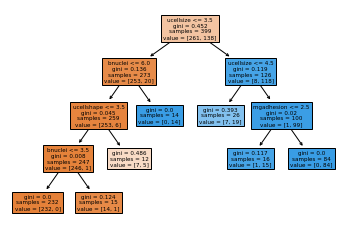

In [12]:
#instanciation de l'arbre
arbreFirst = DecisionTreeClassifier(min_samples_split=30,min_samples_leaf=10)

#construction de l'arbre
arbreFirst.fit(X = dfTrain.iloc[:,:-1], y = dfTrain.classe)

#affichage graphique de l'arbre - depuis sklearn 0.21
plot_tree(arbreFirst,feature_names = list(df.columns[:-1]),filled=True)

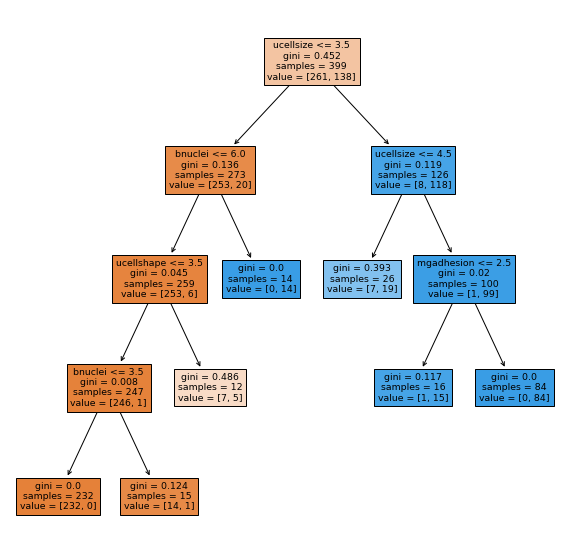

In [13]:
#affichage plus grand pour une meilleure lisibilité
plt.figure(figsize=(10,10))
plot_tree(arbreFirst,feature_names = list(df.columns[:-1]),filled=True)
plt.show()

In [14]:
#affichage sous forme de règles
#plus facile à appréhender quand l'arbre est très grand
tree_rules = export_text(arbreFirst,feature_names = list(df.columns[:-1]),show_weights=True)
print(tree_rules)

|--- ucellsize <= 3.50
|   |--- bnuclei <= 6.00
|   |   |--- ucellshape <= 3.50
|   |   |   |--- bnuclei <= 3.50
|   |   |   |   |--- weights: [232.00, 0.00] class: begnin
|   |   |   |--- bnuclei >  3.50
|   |   |   |   |--- weights: [14.00, 1.00] class: begnin
|   |   |--- ucellshape >  3.50
|   |   |   |--- weights: [7.00, 5.00] class: begnin
|   |--- bnuclei >  6.00
|   |   |--- weights: [0.00, 14.00] class: malignant
|--- ucellsize >  3.50
|   |--- ucellsize <= 4.50
|   |   |--- weights: [7.00, 19.00] class: malignant
|   |--- ucellsize >  4.50
|   |   |--- mgadhesion <= 2.50
|   |   |   |--- weights: [1.00, 15.00] class: malignant
|   |   |--- mgadhesion >  2.50
|   |   |   |--- weights: [0.00, 84.00] class: malignant



In [15]:
#importance des variables
impVarFirst = {"Variable":df.columns[:-1],"Importance":arbreFirst.feature_importances_}
print(pandas.DataFrame(impVarFirst).sort_values(by="Importance",ascending=False))

     Variable  Importance
1   ucellsize    0.816627
5     bnuclei    0.158477
2  ucellshape    0.024243
3  mgadhesion    0.000653
0       clump    0.000000
4      sepics    0.000000
6  bchromatin    0.000000
7    normnucl    0.000000
8     mitoses    0.000000


In [16]:
#prédiction sur l'échantillon test
predFirst = arbreFirst.predict(X=dfTest.iloc[:,:-1])

#distribution des predictions
print(numpy.unique(predFirst,return_counts=True))

(array(['begnin', 'malignant'], dtype=object), array([199, 101], dtype=int64))


In [17]:
#matrice de confusion
print(metrics.confusion_matrix(dfTest.classe,predFirst))

[[189   8]
 [ 10  93]]


In [18]:
#taux de reconnaissance
print(metrics.accuracy_score(dfTest.classe,predFirst))

0.94


In [19]:
#taux d'erreur
print(1.0 - metrics.accuracy_score(dfTest.classe,predFirst))

0.06000000000000005


In [20]:
#rappel - sensibilité
print(metrics.recall_score(dfTest.classe,predFirst,pos_label='malignant'))

#F1-score
print(metrics.f1_score(dfTest.classe,predFirst,pos_label='malignant'))

#précision
print(metrics.precision_score(dfTest.classe,predFirst,pos_label='malignant'))

#rapport de prédiction
print(metrics.classification_report(dfTest.classe,predFirst))

0.9029126213592233
0.911764705882353
0.9207920792079208
              precision    recall  f1-score   support

      begnin       0.95      0.96      0.95       197
   malignant       0.92      0.90      0.91       103

    accuracy                           0.94       300
   macro avg       0.94      0.93      0.93       300
weighted avg       0.94      0.94      0.94       300



[Text(0.6, 0.8333333333333334, 'ucellsize <= 3.5\ngini = 0.452\nsamples = 399\nvalue = [261, 138]'),
 Text(0.4, 0.5, 'bnuclei <= 6.0\ngini = 0.136\nsamples = 273\nvalue = [253, 20]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.045\nsamples = 259\nvalue = [253, 6]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(0.8, 0.5, 'gini = 0.119\nsamples = 126\nvalue = [8, 118]')]

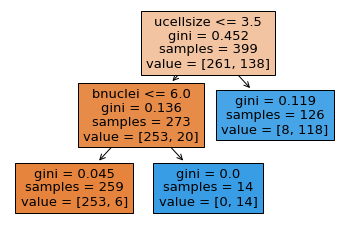

In [21]:
#modifier les paramètres d'apprentissage
arbreSecond = DecisionTreeClassifier(min_samples_split=30,min_samples_leaf=10,max_leaf_nodes=3)

#construction de l'arbre
arbreSecond.fit(X = dfTrain.iloc[:,:-1], y = dfTrain.classe)

#affichage graphique de l'arbre
plot_tree(arbreSecond,feature_names = list(df.columns[:-1]),filled=True)

In [22]:
#importance des variables
impVarSecond = {"Variable":df.columns[:-1],"Importance":arbreSecond.feature_importances_}
print(pandas.DataFrame(impVarSecond).sort_values(by="Importance",ascending=False))

     Variable  Importance
1   ucellsize    0.835229
5     bnuclei    0.164771
0       clump    0.000000
2  ucellshape    0.000000
3  mgadhesion    0.000000
4      sepics    0.000000
6  bchromatin    0.000000
7    normnucl    0.000000
8     mitoses    0.000000


In [23]:
#prédiction sur l'échantillon test
predSecond = arbreSecond.predict(X=dfTest.iloc[:,:-1])

#matrice de confusion
print(metrics.confusion_matrix(dfTest.classe,predSecond))

[[189   8]
 [ 10  93]]


In [24]:
#taux de reconnaissance
print(metrics.accuracy_score(dfTest.classe,predSecond))

0.94
